# Accidental Drug Related Deaths 2012-2018

This dataset is taken from [data.gov](https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015) and represents a listing of accidental drug overdose leading to death in the state of Connecticut.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**First**, import the data which is stored as a csv-file.
**Second**, let's take a look at some info of the dataset.

In [2]:
data = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5105 non-null object
Date                   5103 non-null object
DateType               5103 non-null object
Age                    5102 non-null float64
Sex                    5099 non-null object
Race                   5092 non-null object
ResidenceCity          4932 non-null object
ResidenceCounty        4308 non-null object
ResidenceState         3556 non-null object
DeathCity              5100 non-null object
DeathCounty            4005 non-null object
Location               5081 non-null object
LocationifOther        590 non-null object
DescriptionofInjury    4325 non-null object
InjuryPlace            5039 non-null object
InjuryCity             3349 non-null object
InjuryCounty           2364 non-null object
InjuryState            1424 non-null object
COD                    5105 non-null object
OtherSignifican        169 non-null object
Heroin        

We can see that the number of entries are not the same, so we might need to find out what the reasons are and if we need to do some data cleaning before working with it.

In [3]:
data.head(5)

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [4]:
data[data.isna().all(axis=1)]

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo


The command above tells us that there is no row that has only NaN values. So, there is just missing info. We know that we have 5105 entries. Furthermore, we have 5099 entries in **sex**, so only 6 deaths of whom the sex is unidentified. What we can do, is replace NaN in this column with "unknown". For that, take a look at the first row.

Usually, it would be interesting to know geometric data, that is, if there are locations where deaths reach a significantly high number. However, within this data, there is too much missing info. And since a city by name can exist in several states like Portland, Oregon and Portland, Maine, these infos will not used. Thus, these columns can be erased.

In [6]:
data.drop(['DateType', 'ResidenceCity', 'ResidenceCounty'], axis=1, inplace=True)
data.drop(['ResidenceState', 'DeathCity', 'DeathCounty', 'Location', 'LocationifOther'], axis=1, inplace=True)
data.drop(['DescriptionofInjury', 'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 28 columns):
ID                    5105 non-null object
Date                  5103 non-null object
Age                   5102 non-null float64
Sex                   5099 non-null object
Race                  5092 non-null object
COD                   5105 non-null object
OtherSignifican       169 non-null object
Heroin                2529 non-null object
Cocaine               1521 non-null object
Fentanyl              2232 non-null object
FentanylAnalogue      389 non-null object
Oxycodone             607 non-null object
Oxymorphone           108 non-null object
Ethanol               1247 non-null object
Hydrocodone           118 non-null object
Benzodiazepine        1343 non-null object
Methadone             474 non-null object
Amphet                159 non-null object
Tramad                130 non-null object
Morphine_NotHeroin    42 non-null object
Hydromorphone         25 non-null object
O

In [7]:
data['Sex'].fillna('Unknown', inplace=True)
data.head(3)

,ID,Date,Age,Sex,Race,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,NaN,Unknown,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,48.0,Male,Black,Cocaine Intoxication,NaN,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN


##### What we can do, is to extract the year and place it into a new column. The entries of the dates are stored as strings. Either we transform the entire column into datetime or we extract the year, which is always at the same location of one string. We could do that in the following way:

In [8]:
def year(x):
    x = x.split('/')[2]
    x = x.split(' ')[0]
    return x

#data['Year'] = data['Date'].apply(lamdbda x: year(x))

**However**, that won't work that easy because data is missing. Take a look at the line below.

In [9]:
data[data['Date'].isna()]

,ID,Date,Age,Sex,Race,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
12,15-0728,NaN,NaN,Unknown,NaN,Ruptured Aneurysm of right Iliac Artery with H...,Acute Cocaine,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
2682,15-0729,NaN,28.0,Male,White,Acute 2-Aminoindane/2-Indanamine Toxicity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2-A,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","STRATFORD, CT\n(41.200888, -73.131323)"


We see that the extraction of the date is not as simple because there are 2 rows with missing data. However, by looking at the first 20 rows, we can see that the first 2 digits from the column **ID** represent the year, too.

In [10]:
data['Year'] = ('20' + data['ID'].str[0:2]).astype('int32')
data.head(3)

,ID,Date,Age,Sex,Race,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,Year
0,14-0273,06/28/2014 12:00:00 AM,NaN,Unknown,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2014
1,13-0102,03/21/2013 12:00:00 AM,48.0,Male,Black,Cocaine Intoxication,NaN,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",2013
2,16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,...,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,2016


Now, we can answer a first simple question:
### What is the number of accidental drug related deaths for the years 2012 - 2018?

In [11]:
statsyear = data['ID'].groupby(data['Year']).count()
statsyear

Year
2012     355
2013     490
2014     558
2015     729
2016     917
2017    1038
2018    1018
Name: ID, dtype: int64

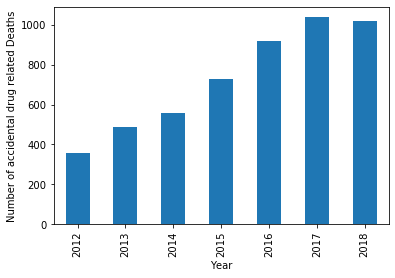

In [12]:
fig1 = statsyear.plot(kind='bar')
fig1.set_ylabel('Number of accidental drug related Deaths')
plt.show()

### How does that look like if we differentiate by the sexes?

In [13]:
statsyearsex = data.groupby(['Year', 'Sex'])['ID'].count()
statsyearsexdf = statsyearsex.to_frame().unstack()['ID']
statsyearsexdf

Sex,Female,Male,Unknown
Year,,,
2012,97.0,258.0,NaN
2013,140.0,350.0,NaN
2014,167.0,390.0,1.0
2015,190.0,537.0,2.0
2016,232.0,685.0,NaN
2017,260.0,777.0,1.0
2018,239.0,776.0,3.0


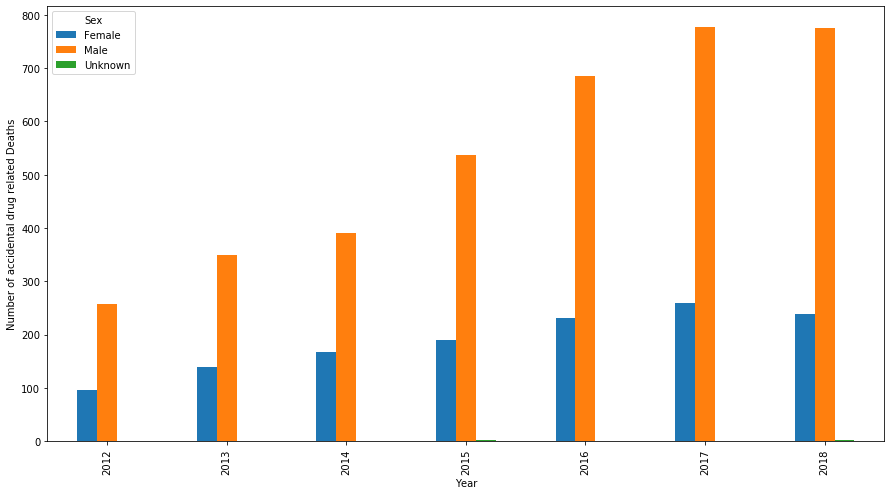

In [15]:
fig2 = statsyearsexdf.plot(kind='bar', figsize=(15,8))
fig2.set_ylabel('Number of accidental drug related Deaths')
plt.show()

We can see that drug related deaths among males outperform females by far and every year.That could be related to statistics of drug addiction, homelessness or unemployment. However, there is no data within this dataset, so these are only assumptions.

### How about the development of substances?

For a first look, we only use the substance data. For that, we create a copy of the dataset and erase all unnecessary data.

In [16]:
drugs = data.copy()
drugs.drop(['ID', 'Date', 'Age', 'Sex', 'Race', 'COD'], axis=1, inplace=True)
drugs.drop(['OtherSignifican', 'MannerofDeath', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo'], axis=1, inplace=True)
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 18 columns):
Heroin                2529 non-null object
Cocaine               1521 non-null object
Fentanyl              2232 non-null object
FentanylAnalogue      389 non-null object
Oxycodone             607 non-null object
Oxymorphone           108 non-null object
Ethanol               1247 non-null object
Hydrocodone           118 non-null object
Benzodiazepine        1343 non-null object
Methadone             474 non-null object
Amphet                159 non-null object
Tramad                130 non-null object
Morphine_NotHeroin    42 non-null object
Hydromorphone         25 non-null object
Other                 435 non-null object
OpiateNOS             88 non-null object
AnyOpioid             2466 non-null object
Year                  5105 non-null int32
dtypes: int32(1), object(17)
memory usage: 698.1+ KB


In [17]:
drugs_grouped = drugs.groupby(drugs['Year']).count()
drugs_grouped

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
Year,,,,,,,,,,,,,,,,,
2012,174,105,14,0,70,30,61,15,49,33,7,8,0,0,39,0,0
2013,257,147,37,0,74,16,83,19,78,47,4,7,0,0,48,0,0
2014,325,127,75,0,101,29,126,15,157,51,13,15,0,0,60,0,0
2015,416,175,188,0,95,6,176,20,221,72,20,16,12,0,77,30,665
2016,494,275,482,0,110,7,255,20,242,84,19,17,16,0,77,32,853
2017,474,347,676,139,95,8,290,15,330,99,40,28,12,16,66,12,0
2018,389,345,760,250,62,12,256,14,266,88,56,39,2,9,68,14,948


In [18]:
columns = drugs_grouped.columns.values
years = drugs_grouped.index.values

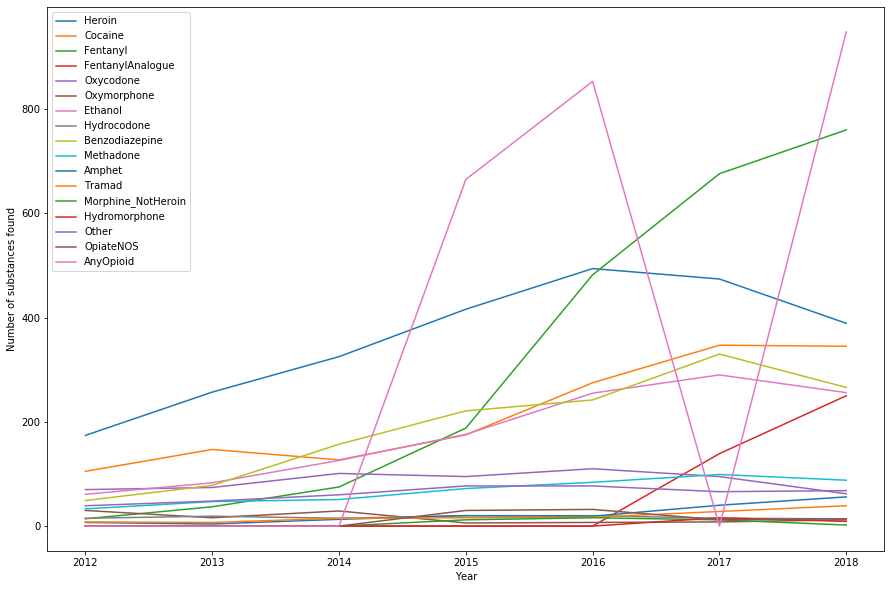

In [19]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)

for column in columns:
    ax.plot(years, drugs_grouped[column], label=column)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Number of substances found')
plt.show()

That diagram contains a lot of information but we can see an increase in **Fentanyl**, **Cocaine** and **Fentanyl Analogue**. Furthermore, they increase within the same period. Let's take a look at these for males and females.

In [20]:
data2 = data[['Year', 'Sex', 'Cocaine', 'Fentanyl', 'FentanylAnalogue']].copy()

In [24]:
dist = data2.groupby(['Year', 'Sex']).count()

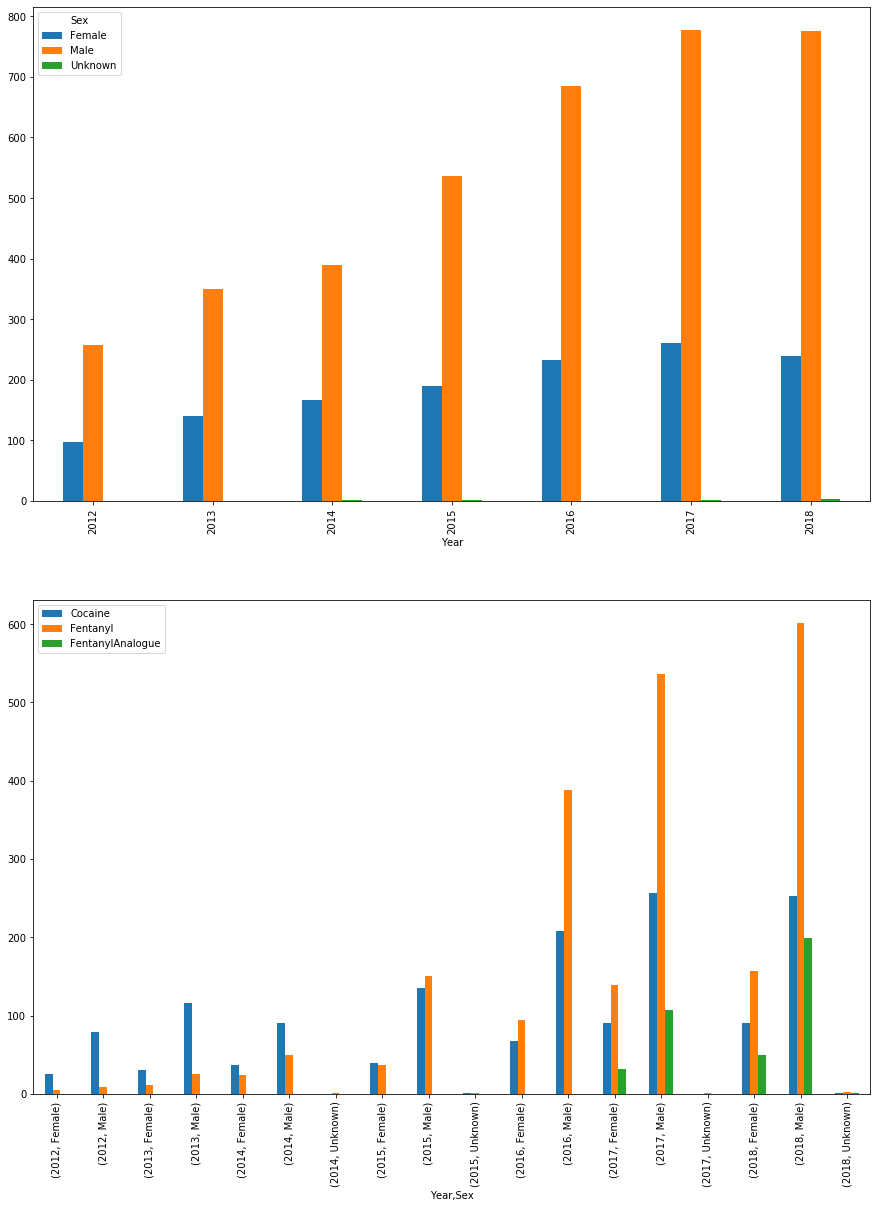

In [25]:
fig4, axes = plt.subplots(2,1, figsize=(15,20))
statsyearsexdf.plot(kind='bar', ax = axes[0])
dist.plot(kind='bar', ax = axes[1])
plt.show()

The increase in abuse of these substances show a good correlation with the general increase of drug abuse and cen be related to the facts that:
- fentanyl can be subscribed
- is a drug with a high impact but also cheap

# What about distribution of race and age?

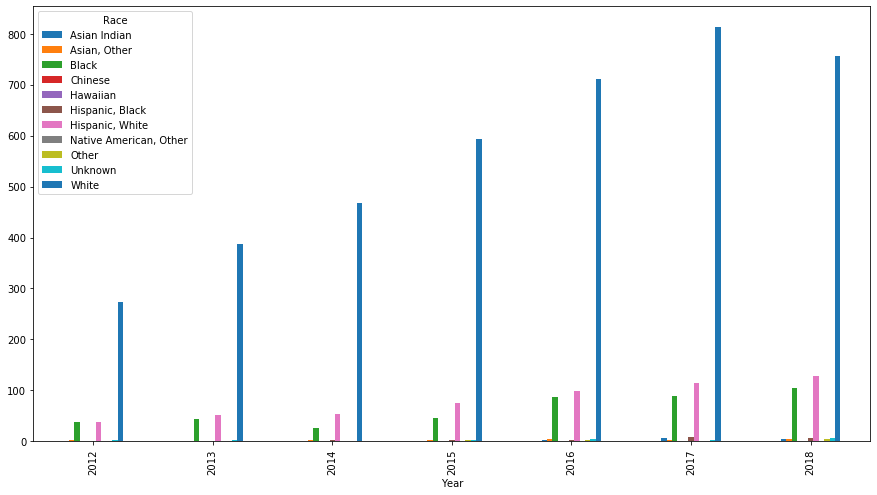

In [26]:
race = data.groupby(['Year', 'Race'])['ID'].count()
race = race.to_frame().unstack()['ID']
race.plot(kind='bar', figsize=(15,8))
plt.show()

We can see throughout every year that drug related deaths happen mostly to white people throughout every year by far. That could be because of:
- the high number of white residents among the population in Connecticut
- Fincancial reasons

In [27]:
interv = pd.cut(data['Age'], np.arange(0,101,20))
interv.index = data['Year']
interv_df = pd.DataFrame({'Year': data['Year'].values, 'AgeIntervals': interv.values})
ages = interv_df.groupby(['Year', 'AgeIntervals'])['Year'].count().unstack()
ages

AgeIntervals,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"
Year,,,,,
2012,15.0,161.0,161.0,18.0,NaN
2013,10.0,211.0,247.0,21.0,1.0
2014,11.0,239.0,279.0,27.0,1.0
2015,16.0,322.0,343.0,46.0,NaN
2016,13.0,405.0,448.0,51.0,NaN
2017,12.0,511.0,451.0,64.0,NaN
2018,14.0,447.0,473.0,83.0,1.0


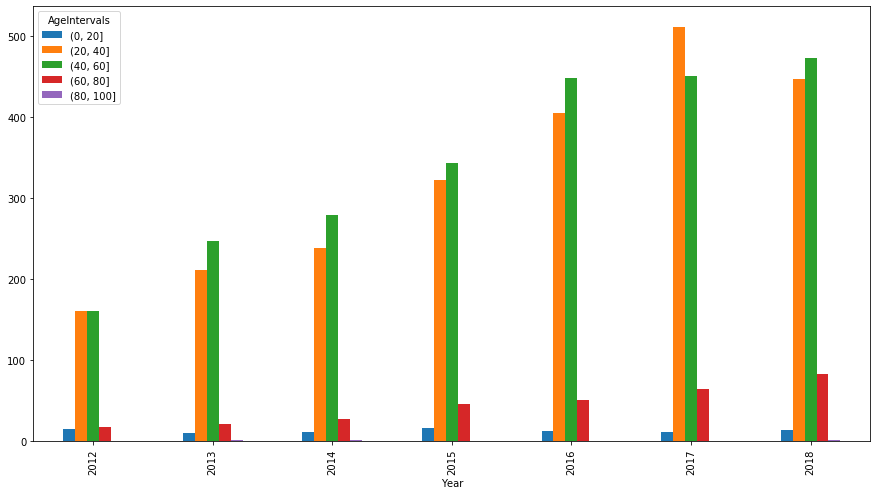

In [28]:
ages.plot(kind='bar', figsize=(15,8))
plt.show()